In [114]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from keras.models import Sequential
from keras.layers import Dense
import plotly.express as px

In [115]:
df = pd.read_csv(r"C:\Users\goura\OneDrive\Documents\Disease_Prediction_Datasets\Disease_symptom_and_patient_profile_dataset.csv")
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19.0,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25.0,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25.0,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25.0,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25.0,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80.0,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85.0,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85.0,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90.0,Female,High,High,Positive


# Data Cleaning

In [116]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df = df.drop_duplicates()
df = df.rename(columns={'Outcome Variable': 'Results'})

# Exploratory Data Analysis (EDA)

### Pie Chart for the Results, for patients whose Age < 45

<Axes: ylabel='count'>

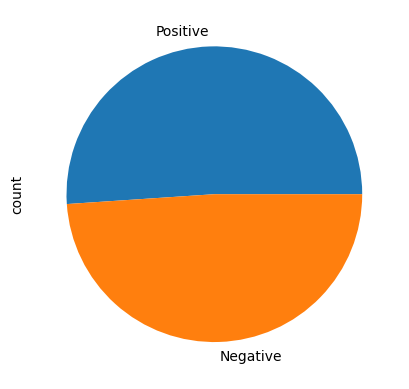

In [117]:
df[df.loc[:,'Age'] < 45]['Results'].value_counts().plot(kind='pie')

### Pie chart for the Results, for patients whose Age > 45

<Axes: ylabel='count'>

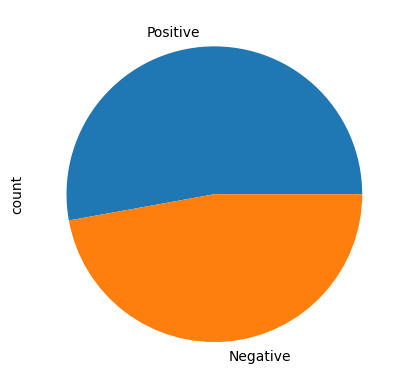

In [118]:
df[df.loc[:,'Age'] > 45]['Results'].value_counts().plot(kind='pie')

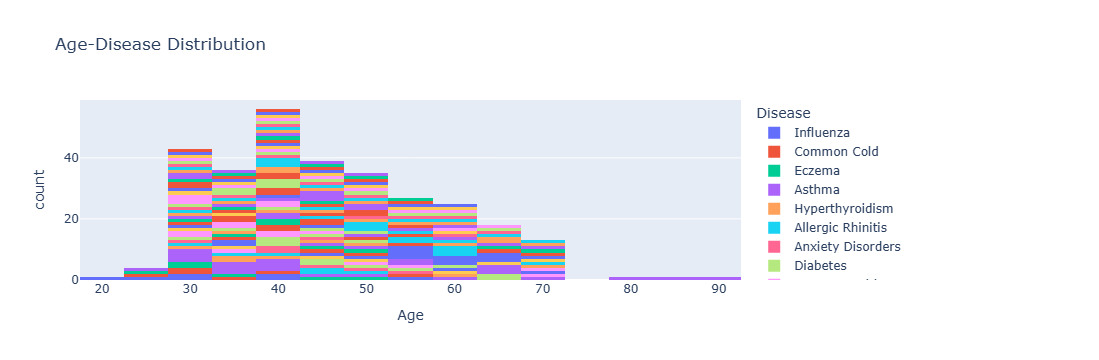

In [119]:
fig = px.histogram(df, x='Age', title='Age-Disease Distribution', color='Disease')
fig.show()

# Data Transformation

In [120]:
encoder1 = OneHotEncoder(sparse_output=False, drop='first')
encoder2 = LabelEncoder()
df['Disease'] = encoder2.fit_transform(df['Disease'])
for col in ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Results']:
    df[col] = encoder1.fit_transform(df[[col]])

X = df.drop('Results', axis=1)
Y = df['Results']
mmc = MinMaxScaler()
X = mmc.fit_transform(X)

# Model Building

In [121]:
# Building Models
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

In [122]:
# Logistic Regression
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(X_train, y_train)
y_pred_lrc = lrc.predict(X_test)

# Decision Tree
dtc = DecisionTreeClassifier(max_depth=6)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

# K-Nearest Neighbors
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)

# Neural Network Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
8/8 [==============================] - 1s 70ms/step - loss: 0.6828 - accuracy: 0.5792 - val_loss: 0.6593 - val_accuracy: 0.7167
Epoch 2/10
8/8 [==============================] - 0s 13ms/step - loss: 0.6678 - accuracy: 0.6667 - val_loss: 0.6457 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 0s 27ms/step - loss: 0.6553 - accuracy: 0.6917 - val_loss: 0.6308 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 0s 40ms/step - loss: 0.6427 - accuracy: 0.6667 - val_loss: 0.6155 - val_accuracy: 0.7667
Epoch 5/10
8/8 [==============================] - 0s 49ms/step - loss: 0.6317 - accuracy: 0.7000 - val_loss: 0.5982 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 0s 51ms/step - loss: 0.6223 - accuracy: 0.6875 - val_loss: 0.5839 - val_accuracy: 0.7667
Epoch 7/10
8/8 [==============================] - 0s 24ms/step - loss: 0.6117 - accuracy: 0.6792 - val_loss: 0.5717 - val_accuracy: 0.7667
Epoch 8/10
8/8 [===========

# Model Evaluation

In [123]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"---{model_name} Evaluation---")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

In [124]:
# Evaluate Models
evaluate_model(y_test, y_pred_lrc, "Logistic Regression")
evaluate_model(y_test, y_pred_dtc, "Decision Tree")
evaluate_model(y_test, y_pred_knc, "K-Nearest Neighbors")

# Neural Network Evaluation
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)
evaluate_model(y_test, y_pred_nn, "Neural Network")

---Logistic Regression Evaluation---
Accuracy: 0.77
Precision: 0.82
Recall: 0.77
F1 Score: 0.79
[[19  6]
 [ 8 27]]
              precision    recall  f1-score   support

         0.0       0.70      0.76      0.73        25
         1.0       0.82      0.77      0.79        35

    accuracy                           0.77        60
   macro avg       0.76      0.77      0.76        60
weighted avg       0.77      0.77      0.77        60

---Decision Tree Evaluation---
Accuracy: 0.67
Precision: 0.73
Recall: 0.69
F1 Score: 0.71
[[16  9]
 [11 24]]
              precision    recall  f1-score   support

         0.0       0.59      0.64      0.62        25
         1.0       0.73      0.69      0.71        35

    accuracy                           0.67        60
   macro avg       0.66      0.66      0.66        60
weighted avg       0.67      0.67      0.67        60

---K-Nearest Neighbors Evaluation---
Accuracy: 0.70
Precision: 0.74
Recall: 0.74
F1 Score: 0.74
[[16  9]
 [ 9 26]]
       

# Hyperparameter Tuning

In [125]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

param_grid_dtc = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid_dtc, cv=5)
grid_dtc.fit(X_train, y_train)

print(f"Best KNN Parameters: {grid_knn.best_params_}")
print(f"Best Decision Tree Parameters: {grid_dtc.best_params_}")

Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 7}
Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_split': 2}


# Feature Importance for Decision Tree

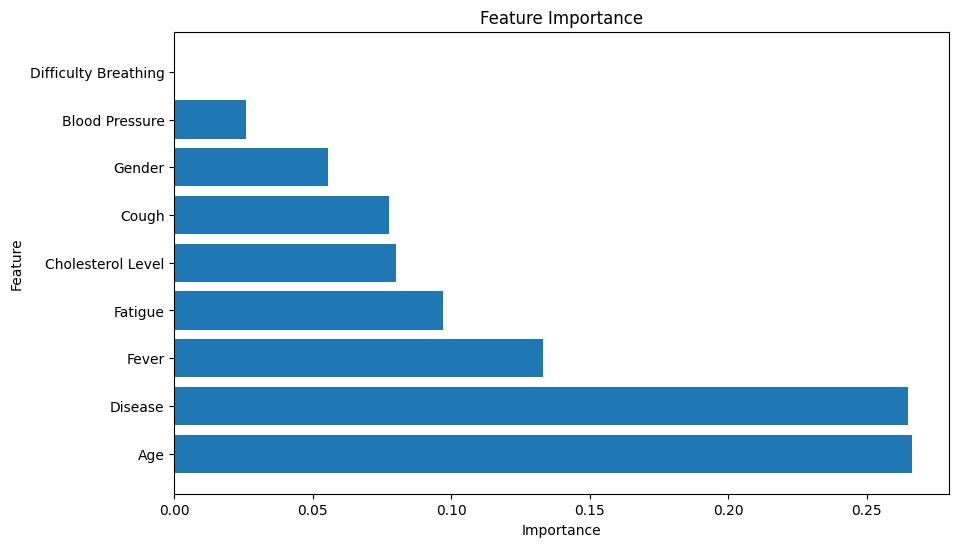

In [126]:
feature_importances = dtc.feature_importances_
features = df.drop('Results', axis=1).columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# ROC Curve Visualization

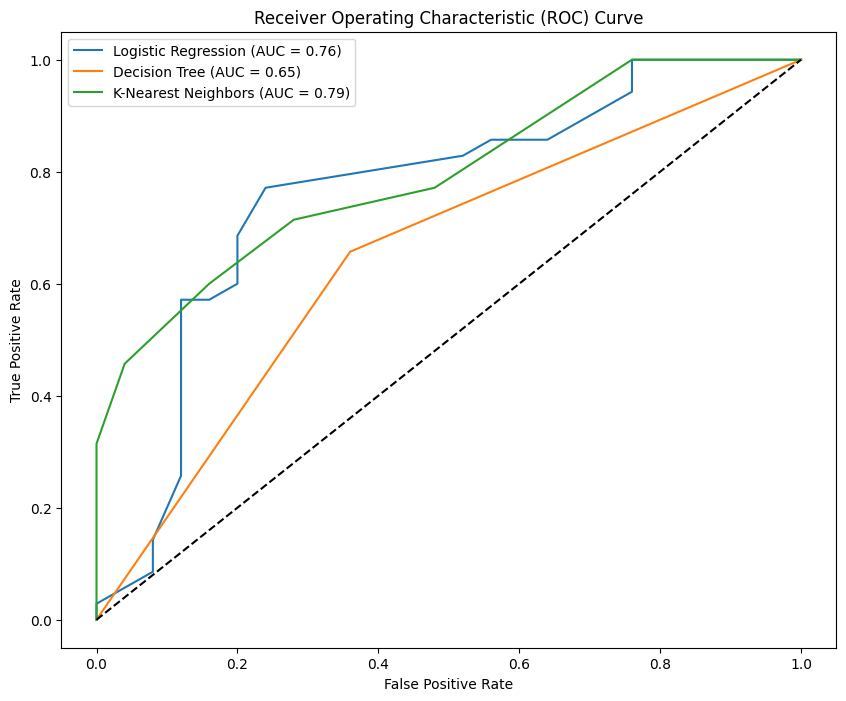

In [127]:
def plot_roc_curve(model, X_test, y_test, model_name):
    if model_name == "Neural Network":
        y_pred_prob = model.predict(X_test)
        y_pred_prob = (y_pred_prob > 0.5).astype(int)[:, 0]
    else:
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(10, 8))
plot_roc_curve(lrc, X_test, y_test, "Logistic Regression")
plot_roc_curve(grid_dtc.best_estimator_, X_test, y_test, "Decision Tree")
plot_roc_curve(grid_knn.best_estimator_, X_test, y_test, "K-Nearest Neighbors")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

In [128]:
# Save Model
joblib.dump(lrc, 'disease_prediction_model.joblib')
joblib.dump(mmc, 'min_max_scaler.joblib')

['min_max_scaler.joblib']

# Prediction

In [129]:
def load_model_and_predict(new_data):
    loaded_model = joblib.load('disease_prediction_model.joblib')
    loaded_mmc = joblib.load('min_max_scaler.joblib')
    
    # Reindex to match training features, filling missing with NaN
    expected_columns = df.drop('Results', axis=1).columns.tolist()
    new_data = new_data.reindex(columns=expected_columns, fill_value=0)  # Replace NaN with 0

    # Check for NaN values
    if new_data.isnull().any().any():
        raise ValueError("Input data contains NaN values after reindexing.")

    new_data_scaled = loaded_mmc.transform(new_data)  # Scale the data
    
    # Predict using the NumPy array
    prediction = loaded_model.predict(new_data_scaled)
    return prediction

### Pred on One Patient

In [130]:
new_data = pd.DataFrame({
    'Age': [30],
    'Fever': [1],
    'Cough': [0],
    'Fatigue': [1],
    'Difficulty Breathing': [0],
    'Gender': [1],
    'Blood Pressure': [1],
    'Cholesterol Level': [0]
})

try:
    prediction = load_model_and_predict(new_data)
    print(f'Predicted Disease Outcome: {prediction[0]}')
except ValueError as e:
    print("Error during prediction:", e)

Predicted Disease Outcome: 0.0


### Pred On Multiple Patients

In [131]:
import pandas as pd

# Combined Dataset: Severe Symptoms and No Symptoms
new_data = pd.DataFrame({
    'Age': [55, 65, 48, 72, 60, 18, 29, 35, 42, 55],
    'Fever': [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    'Cough': [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    'Fatigue': [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    'Difficulty Breathing': [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    'Gender': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
    'Blood Pressure': [1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    'Cholesterol Level': [1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
})

# Example Prediction
try:
    prediction = load_model_and_predict(new_data)
    print(f'Predicted Disease Outcomes: {prediction}')
except ValueError as e:
    print("Error during prediction:", e)

Predicted Disease Outcomes: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Model Created